# Gambler's ruin problem

### Task 1 
Generate random variable `x` historgram and fill it with random values generated using Gaussian distribution.

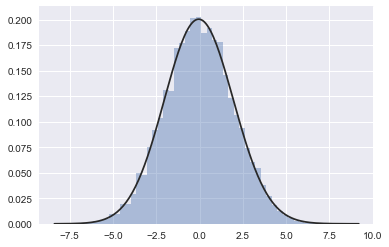

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

sns.distplot(np.random.normal(0, 2, 10000), kde=False, fit=stats.gamma)

### Task 2
Plot bankroll after each coin toss for both players.

In [2]:
# Gambler ruin game for two players:
#  player_bank: int - initial number of coins for player
#  opponent_bank: int - initial number of coins for opponent 
#  p: float - propability of player win
#  max_i: int - maximum number of iterations allowed
def gambler_ruin(player_bank, opponent_bank, p, max_i):
    player = player_bank
    opponent = opponent_bank
    hist_player = [player]
    hist_opponent = [opponent]
    i = max_i
    while 0 < player < (player_bank + opponent_bank) and 0 < i:
        result = (-1, 1) if p < np.random.random() else (1, -1)
        player += result[0]
        opponent += result[1]
        hist_player.append(player)
        hist_opponent.append(opponent)
        i -= 1
    return {"player":hist_player, "opponent":hist_opponent}

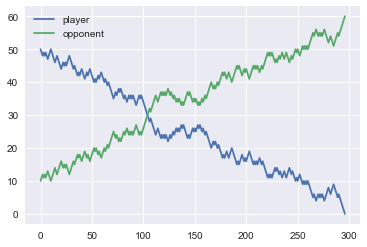

In [3]:
result = gambler_ruin(50, 10, 0.42, 1000)    
plt.plot(result["player"], label="player")
plt.plot(result["opponent"], label="opponent")
plt.legend(loc='best')
plt.show()

### Task 3
Plot propability distribution of gambler's ruin for initial bankroll. Compare results with analitical results.

In [4]:
# Propability for -fair- coin flipping
#  n1: int - first player coins
#  n2: int - second player coins
def fair_propability(n1, n2):
    return n2 / (n1 + n2)

# Propability for -unfair- coin flipping 
#  n1: int - first player coins
#  n2: int - second player coins
#  p: float - propability of player win
#  q: float - propability of opponent win
def unfair_propability(n1, n2, p, q):
    # Note that p + q should always be equal to 1 !!!
    if p == 0.5 or q ==0.5:
        return fair_propability(n1, n2)
    return (1 - (p / q) ** n2) / (1 - (p / q) ** (n1 + n2))

# Propability of gambler ruin for two players (analitical approach)
#  player_bank: int - initial number of coins for player
#  opponent_bank: int - initial number of coins for opponent 
#  p: float - propability of player win
#  q: float - propability of opponent win
def analitical_gambler_ruin(player_bank, opponent_bank, p, q):
    player_propability = unfair_propability(player_bank, opponent_bank, p, q)
    return (player_propability, 1 - player_propability)

# Combine result from actual gambler ruin and analytical result
#  bankroll_range: int - a range that will be used as the initial nuber of coins for both players
#  propability: float - propability of player win
#  max_i: int 
def generate_results(tests, bankroll_range, propability, max_i):    
    player_results = []
    player_losing_predictions = []
    for bankroll in bankroll_range:
        tests_losts = 0
        tests_won = 0
        analitical_result = analitical_gambler_ruin(bankroll, bankroll, propability, 1-propability)[0]
        for _ in range(0, tests):
            result = gambler_ruin(bankroll, bankroll, propability, max_i)
            tests_losts += 1 if result["player"][-1] == 0 else 0
        player_results.append(tests_losts/tests)
        player_losing_predictions.append(analitical_result)
    return [player_results, player_losing_predictions]

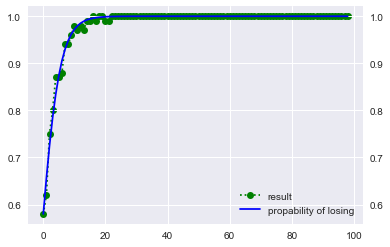

In [5]:
def plot_and_show(values, twinx_values, title, twinx_title, color, twinx_color):
    fig, axis = plt.subplots()
    twinx_axis = axis.twinx()
    lines = axis.plot(values, label=title, color=color, marker='o', linestyle=":")
    lines += twinx_axis.plot(twinx_values, label=twinx_title, color=twinx_color)
    labels = [line.get_label() for line in lines]
    plt.legend(lines, labels, loc='best')
    plt.show()

results = generate_results(100, range(1, 100), 0.42, 10000)
plot_and_show(results[0], results[1], "result", "propability of losing", "g", "b")

### Task 4
Plot histogram for number of coin tosses needed to finish game with different propabilities.

In [6]:
# Get total of turns for each testes game
#  tests: int - a numer of test -> how many games will be played
#  bankroll: int - initial nuber of coins for both players
#  propability: float - propability of player win
#  max_i: int 
def number_of_games_to_end(tests, bankroll, propability, max_i = 1000):
    tests_results = []
    for _ in range(0, tests):
        game_result = gambler_ruin(bankroll, bankroll, propability, max_i)
        tests_results.append(len(game_result["player"] + game_result["player"]))
    return tests_results

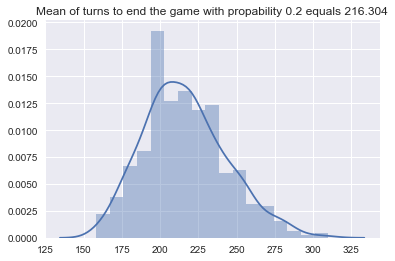

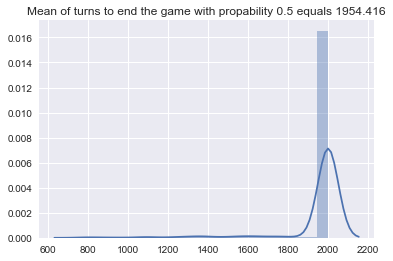

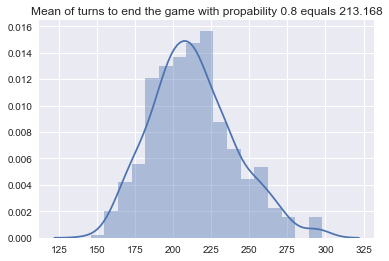

In [7]:
means = []
def plot_and_show(data, title):
    means.append(np.mean(data))
    sns.distplot(data)
    plt.title(title)
    plt.show()
    
propabilities = [0.2, 0.5, 0.8]
for propability in propabilities:
    game_results = number_of_games_to_end(500, 64, propability)
    plot_and_show(game_results, "Mean of turns to end the game with propability " + str(propability) + " equals " + str(np.mean(game_results)))

### Task 5
Plot the average number of coin tosses needed for the game to finish for different propability

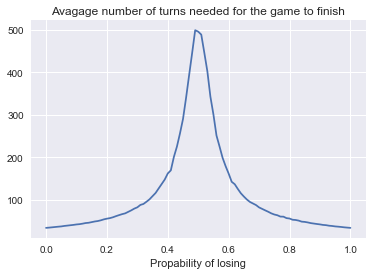

In [8]:
propabilities = [propability/100 for propability in range(101)]
results = [np.mean(number_of_games_to_end(1024, 16, propability)) for propability in propabilities]
plt.plot(propabilities, results)
plt.title("Avagage number of turns needed for the game to finish")
plt.xlabel("Propability of losing")
plt.show()

### Task 6
Plot players bankroll after `n` amount of games.

In [9]:
# Return players bankroll after desired amount of games played
#  plays: int - a numer of test -> how many games will be played
#  bankroll: int - initial nuber of coins for both players
#  propability: float - propability of player win
#  max_i: int 
def players_bankroll_after(plays, bankroll, propability, max_i = 1000):
    results = [ gambler_ruin(bankroll, bankroll, propability, max_i)["player"][-1] for _ in range(plays)]
    return results

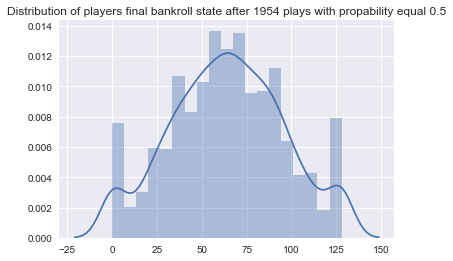

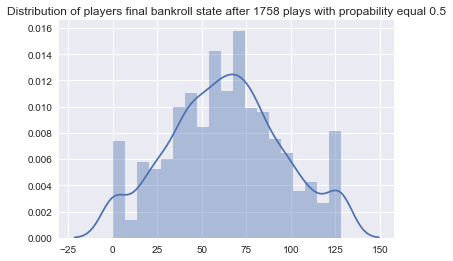

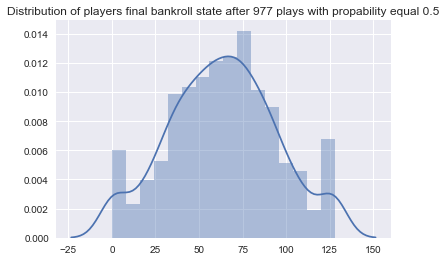

In [10]:
propability = 0.5
n_bar = int(means[1])
playsarr = [n_bar, int(0.9 * n_bar), int(0.5 * n_bar)]

for plays in playsarr:
    results = players_bankroll_after(plays, 64, propability)
    plot_and_show(results, "Distribution of players final bankroll state after " + str(plays) + " plays with propability equal " + str(propability))

### Task 7
Plot propability distribution for player's ruin for different initial propability for small and big initial bankroll.

In [11]:
# Return propability of losing after desired amount of tests, propability and bankroll
#  tests: int - a numer of test -> how many games will be played
#  bankroll: int - initial nuber of coins for both players
#  propability: float - propability of player win
#  max_i: int 
def propability_of_losing(tests, bankroll, propability, max_i = 1000):
    results = [gambler_ruin(bankroll, bankroll, propability, max_i)["player"][-1] == 0 for _ in range(tests)]
    return np.mean(results)

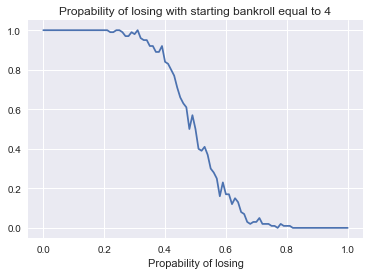

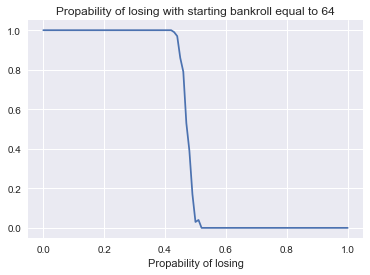

In [ ]:
bankrolls = [4, 64]
propabilities = [propability/100 for propability in range(101)]
for bankroll in bankrolls:
    results = [propability_of_losing(100, bankroll, propability) for propability in propabilities]
    plt.plot(propabilities, results)
    plt.title("Propability of losing with starting bankroll equal to " +  str(bankroll))
    plt.xlabel("Propability of losing")
    plt.show()

In [108]:
%%time
def adjusted_probabilities(probabilities, losers):
    change = 0
    for loser in losers:
        change += probabilities[loser]
        probabilities.pop(loser)
    for player in probabilities:
        probabilities[player] += change/len(probabilities.keys())
    return probabilities

def n_gamblers_ruin(nplayers: int, probabilities: list = None, bankrolls: list = None, max_i=1000):
    players, bank = {}, {}
    if probabilities is None:
        probabilities = np.full(nplayers, 1/nplayers)
    if bankrolls is None:
        bankrolls = np.full(nplayers, 16)
    for index, bankroll in enumerate(bankrolls):
        key = "player_" + str(index)
        players[key] = probabilities[index]
        bank[key] = [bankroll]
    for _ in range(max_i):
        winner, losers = np.random.choice(a=list(players.keys()), p=list(players.values())), []
        for player in players.keys():
            if player == winner:
                bank[player].append(bank[player][-1] + len(players.keys()) - 1)
            else:
                bank[player].append(bank[player][-1] - 1)
            if bank[player][-1] == 0:
                losers.append(player)
        probabilities = adjusted_probabilities(players, losers)
        if len(players) == 1:
            break                         
    return bank

results = n_gamblers_ruin(64)
for player in results:
    print(player, results[player][-1])

player_0 0
player_1 0
player_2 0
player_3 0
player_4 0
player_5 143
player_6 0
player_7 0
player_8 0
player_9 0
player_10 0
player_11 219
player_12 0
player_13 0
player_14 0
player_15 0
player_16 0
player_17 0
player_18 178
player_19 124
player_20 166
player_21 0
player_22 0
player_23 0
player_24 0
player_25 0
player_26 0
player_27 0
player_28 85
player_29 0
player_30 0
player_31 0
player_32 0
player_33 24
player_34 0
player_35 0
player_36 0
player_37 0
player_38 0
player_39 85
player_40 0
player_41 0
player_42 0
player_43 0
player_44 0
player_45 0
player_46 0
player_47 0
player_48 0
player_49 0
player_50 0
player_51 0
player_52 0
player_53 0
player_54 0
player_55 0
player_56 0
player_57 0
player_58 0
player_59 0
player_60 0
player_61 0
player_62 0
player_63 0
CPU times: user 46.9 ms, sys: 10.5 ms, total: 57.5 ms
Wall time: 49.1 ms
